## Lab Weeek4


## <font color=#0A1172>2. Create a bigram word cloud of the UN General Debates dataset of years 1970 – 1990 and 1990 to the latest (remove stopwords first)</font>  

In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import nltk
stopwords = set(nltk.corpus.stopwords.words('english'))

In [3]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [32]:
un = pd.read_csv('un-general-debates-blueprint.csv.gz')
un['tokens'] = un['text'].apply(prepare, pipeline=pipeline)
un['bigram'] = un['tokens'].apply(ngrams, 2)
text1 = un[un['year']<=1990]
text2 = un[un['year']>1990]

In [23]:
def count_words(df, column='bigram', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'bigram'
    
    return freq_df.sort_values('freq', ascending=False)

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

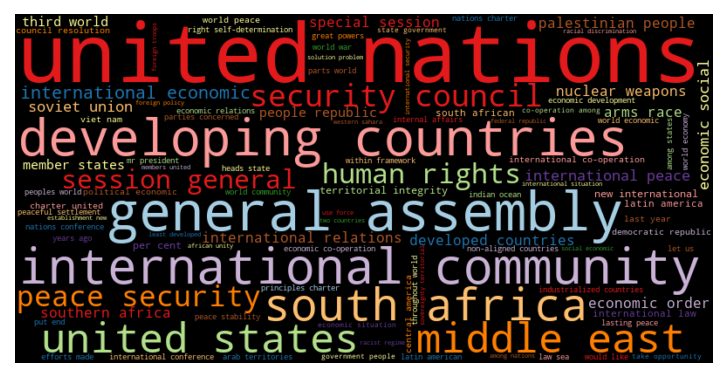

In [31]:
freq_2015_df = count_words(text1)
plt.figure(dpi=150)
wordcloud(freq_2015_df['freq'], max_words=100)

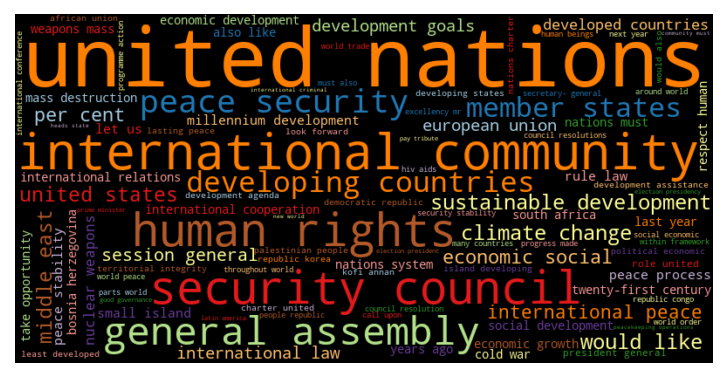

In [33]:
freq_2015_df = count_words(text2)
plt.figure(dpi=150)
wordcloud(freq_2015_df['freq'], max_words=100)